# Статистика, прикладной поток
## Практическое занятие 1


In [18]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

<font color="red">Другие библиотеки использовать запрещено.

Шаблоны кода ниже менять нельзя. Если вы не знаете, как написать код, спросите преподавателя. Также это повод посмотреть или послушать материал по библиотекам.
</font>

**Задача.**
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из многомерного нормального распределения с заданными параметрами.

*Часть 1.* Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

In [36]:
coin = sps.bernoulli(0.5).rvs # симметричная монета
# Должно работать так:
# coin(size=10) --- реализация 10 бросков монеты

def uniform(size=1, precision=30):
    # добавили еще одну размерность (где коин), умножили поэлементно 2 вектора (по последней координате)
    return (coin(size=np.hstack([size, precision])) * 2.**(-1 - np.arange(precision))).sum(axis=-1)

uniform(3, 2)

array([0.25, 0.  , 0.75])

Для $U[0, 1]$ сгенерируйте 200 независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

Исследуйте, как меняются значения случайных величин в зависимости от precision.

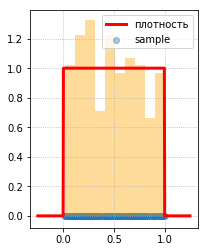

In [41]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, 50)

plt.figure(figsize=(3, 4))
# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample, 
    np.zeros(size), 
    alpha=0.4, 
    label='sample'
)
# по точкам строим нормированную полупрозрачную гистограмму, нормировка по плотности
plt.hist(
    sample, 
    bins=10, 
    density=True, 
    alpha=0.4, 
    color='orange'
)
# рисуем график плотности
plt.plot(
    grid, 
    sts.uniform.pdf(grid), 
    color='r', 
    linewidth='3', 
    label='плотность'
)
plt.legend()
plt.grid(ls=':')
plt.show()

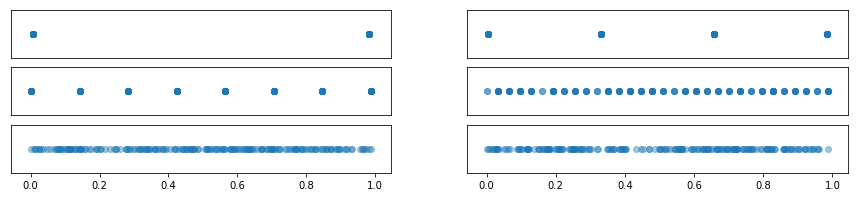

In [52]:
size = 200

plt.figure(figsize=(15, 3))
for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1) # определил подграфик
    plt.scatter(
        uniform(size, precision), # Сгенерируйте выборку размера size точности precision
        np.zeros(size), 
        alpha=0.4
    )
    plt.yticks([])
    if i < 4: plt.xticks([])
plt.show()

**Вывод:**

<...>

*Часть 2.* Напишите функцию генерации случайных величин в количестве `size` штук (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ -- независимые случайные величины, равномерно распределенные на (0, 1]. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. Желательно использовать как можно меньше бросков монеты.

In [61]:
def normal(size=1000, loc=0, scale=1, precision=30):
    return np.cos(2*np.pi*uniform(size, precision)) * np.sqrt((-2) * np.log(uniform(size, precision)))

sample = normal()

array([ 2.49643822, -0.75447596,  1.09732684,  1.95620968,  1.02957529,
       -0.36549723,  0.77504091,  1.74457295, -0.07687095, -0.96986289,
        0.52308437, -0.97835317,  1.60132832, -1.40875253, -1.06549958,
       -1.94962128, -0.56939263,  0.37032048,  1.35340544, -2.40985522,
       -0.06865303, -0.81387938,  1.74445233,  0.54951055, -0.88854204,
        0.33710333,  0.00322538, -0.13102692,  0.6706369 ,  0.82537922,
       -1.48006897, -1.15185231,  0.89619475,  2.20468543,  0.5512337 ,
        0.4368548 ,  0.13414373,  1.22994666,  0.04227441, -0.35937451,
        0.45598494, -0.39016727, -1.26386146, -0.90050772,  0.00346611,
       -0.88415723, -0.63148898, -0.71387132, -0.98426867,  1.94621813,
        1.48291162,  0.21644713, -0.03175722,  0.58284962,  0.40313256,
        1.31643768, -1.24245735,  1.44596536, -0.16859947, -1.51610661,
       -0.1291649 ,  0.09282816, -0.36811723,  0.6110971 ,  0.82413481,
       -0.31948805,  0.07712877,  0.06323658, -1.4999179 ,  1.84

Для $\mathcal{N}(0, 1)$ сгенерируйте 200 независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

AttributeError: module 'scipy.stats' has no attribute 'normal'

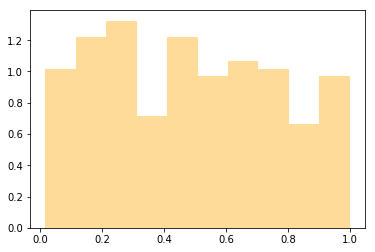

In [62]:
plt.hist(
    sample, 
    bins=10, 
    density=True, 
    alpha=0.4, 
    color='orange'
)
# рисуем график плотности
plt.plot(
    grid, 
    sts.norma.pdf(grid), 
    color='r', 
    linewidth='3', 
    label='плотность'
)

*Часть 3.* Теперь напишите функцию генерации выборки многомерного нормального распределения с заданным вектором средних `mean` и матрицей ковариаций `cov_matrix`. Помочь в этом может теорема об эквивалентных определениях гауссовского вектора. Согласно этой теореме вам нужно сгенерировать вектор из независимых $\mathcal{N}(0, 1)$ случайных величин, домножить на корень из матрицы ковариаций и добавить вектор средних. Для извлечения квадратного корня от матрицы может пригодится следующая функция, которая вычисляет собственные значения и векторы матрицы.

In [ ]:
from scipy.linalg import eigh

На этот раз достаточно, чтобы функция корректно работала в случае, когда `size` является числом.

In [ ]:
def gauss(mean, cov_matrix, size=1, precision=30):
    # Преобразование типов
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    # Проверка на корректность входа
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    
    <...>

Сгенерируйте 200 случайных векторов из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$.
Нанесите сгенерированные точки на график и отметьте цветом значение плотности.

In [ ]:
size = 1000
sample = <...>  # Генерация векторов

grid = np.mgrid[-4:4:0.05, -4:4:0.05]
# Вычисление плотности
density = sps.<плотность многомерного нормального распределения>

plt.<определите график размера 10 на 10>
# тепловой график плотности
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
# отображаем значения случайных вектором полупрозрачными точками
plt.<функция отрисовки точек>(
    sample[:, 0], 
    sample[:, 1], 
    <прозрачность точки равна 0.4>, 
    <подпись точек в легенде к графику>
)
plt.<легенда>
plt.<сетка>(ls=':')
plt.<по оси X обрезать график, установив границы -4 и 4>
plt.<по оси Y обрезать график, установив границы -4 и 4>
plt.show()

**Вывод:**

<...>